In [5]:
%matplotlib inline
from fastai.basics import *

In [6]:
n=100

In [8]:
x = torch.ones(n, 2)
x[:, 0].uniform_(-1, 1)
x[:5]

tensor([[ 0.1200,  1.0000],
        [-0.8451,  1.0000],
        [-0.7470,  1.0000],
        [ 0.1989,  1.0000],
        [ 0.6997,  1.0000]])

In [9]:
a = tensor(3., 2); a

tensor([3., 2.])

In [21]:
x.shape

torch.Size([100, 2])

In [22]:
a.shape

torch.Size([2])

In [24]:
torch.rand(n)

tensor([0.7883, 0.0688, 0.1483, 0.1376, 0.6458, 0.3485, 0.4433, 0.8627, 0.3787,
        0.4596, 0.5590, 0.2070, 0.2472, 0.0832, 0.0481, 0.9440, 0.5741, 0.5318,
        0.5087, 0.7615, 0.5398, 0.5254, 0.0096, 0.2849, 0.5855, 0.1468, 0.4807,
        0.9191, 0.7210, 0.0600, 0.8339, 0.0057, 0.8697, 0.5369, 0.0696, 0.2529,
        0.9825, 0.7278, 0.9359, 0.6998, 0.3626, 0.9889, 0.7485, 0.7294, 0.9768,
        0.4683, 0.9261, 0.6884, 0.3522, 0.7864, 0.6987, 0.2747, 0.9234, 0.1238,
        0.8520, 0.8606, 0.0261, 0.2441, 0.1539, 0.4934, 0.9967, 0.0275, 0.3397,
        0.9787, 0.9428, 0.3530, 0.4007, 0.7378, 0.8198, 0.8288, 0.1241, 0.8679,
        0.9257, 0.4422, 0.1260, 0.9957, 0.4822, 0.8665, 0.1259, 0.8147, 0.7326,
        0.9638, 0.0102, 0.6081, 0.2443, 0.4131, 0.2269, 0.5834, 0.0991, 0.4168,
        0.4168, 0.1610, 0.8210, 0.2053, 0.7960, 0.6042, 0.5490, 0.2257, 0.8751,
        0.5571])

In [10]:
y = x@a + torch.rand(n)

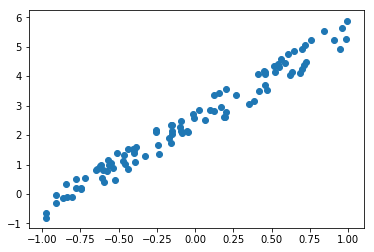

In [26]:
plt.scatter(x[:, 0], y);

In [27]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

In [30]:
a = tensor(-1., 1)

In [31]:
y_hat = x@a
mse(y_hat, y)

tensor(6.8791)

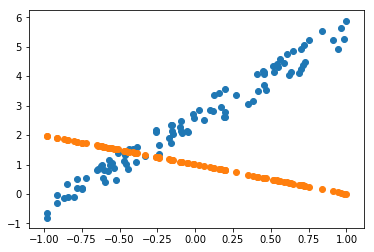

In [32]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

In [33]:
# gradient descent

In [34]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [35]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()


In [36]:
lr = 1e-1
for t in range(100): update()

tensor(6.8791, grad_fn=<MeanBackward1>)
tensor(1.5489, grad_fn=<MeanBackward1>)
tensor(0.4944, grad_fn=<MeanBackward1>)
tensor(0.1987, grad_fn=<MeanBackward1>)
tensor(0.1144, grad_fn=<MeanBackward1>)
tensor(0.0903, grad_fn=<MeanBackward1>)
tensor(0.0834, grad_fn=<MeanBackward1>)
tensor(0.0815, grad_fn=<MeanBackward1>)
tensor(0.0809, grad_fn=<MeanBackward1>)
tensor(0.0808, grad_fn=<MeanBackward1>)


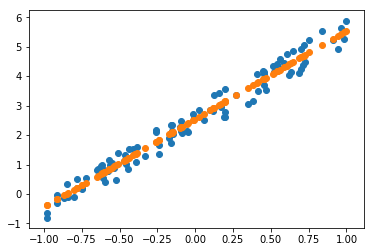

In [38]:
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], x@a)

In [39]:
# animate

In [41]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [47]:
a = nn.Parameter(tensor(-1., 1))

fig = plt.figure()
plt.scatter(x[:, 0], y, c='orange')
line, = plt.plot(x[:, 0], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)